# Chapter 3 Stable Solvers for Stiff ODE Systems

*Editor: Weipeng Xu*

*Last modified: 13/06/2025*

*Reference: Sundnes, Joakim. Solving Ordinary Differential Equations in Python. Springer Nature, 2024.*

## Stiff ODE Systems and Stability

We consider a well-known example of a stiff ODE system - **Van der Pol equation**, which can be written as the following IVP:
$$
\begin{aligned}
&y_1^{\prime} = y_2\\
&y_2^{\prime} = \mu(1-y_1^2)y_2-y_1
\end{aligned}
$$
where $\mu$ represents a constant that deteremines the properties of the system, including its "stiffness". For non-zero values of $\mu$, the solution exhibits far more complex behavior than $\mu=0$ with a analytical solution $y_1 = \cos(t)$ and $y_2=\sin(t)$.

Consider a simple IVP - Dahlquist test euqation:
$$
\begin{aligned}
&u^{\prime} = \lambda u\\
&u(0) = 1
\end{aligned}
$$
where $\lambda$ can be complex number. The above problem will be stiff on $[0,b]$ if the real part of $\lambda$ satisfies
$$
b\mathcal{R}(\lambda)\ll -1
$$
For more general nonlinear problems, the stiffness of the system is determined by the eigenvalues $\lambda_i$ of the matrix of partial derivatives of the right-hand side function $f$:
$$
J_{ij} = \frac{\partial f_i(t,y)}{\partial y_j}
$$
and the problem is considered stiff for an interval $[0,b]$ if
$$
b\min_{i}\mathcal{R}(\lambda_i)\ll-1
$$

The Dahlquist equation provides the foundation for **linear stability analysis**. The analytical solution is $u(t) = e^{\lambda t}$, which is stable if $\lambda$ has a negative real part. So we focus on the case where $\mathcal{R}<0$ where our choice of solver may introduce numerical instabilities. The corresponding update formula for each scheme can be expressed as:
$$
u_{n+1} = R(z)u_n
$$
where $R(z)$ is the **stability function** or **amplification factor**, which is often written as:
$$
R(z) = 1+z
$$
The stability condition is:
$$
\vert R(z)\vert<1
$$

For example, the stability function of the Forward Euler method can be written as:
$$
R(z) = 1 + z = 1+\lambda\Delta t
$$
The stability condition leads to a **region of absolute stability**/**stability region** of $z$, which is a circle with center at $(-1,1)$ and a radius of $1$. It can be seen that if $\lambda\ll0$, the requirement for $z = \lambda\Delta t$ to lie within this circile is quite restrictive for the choice of $\Delta t$.

Similarly, the stability function for the explicit midpoint method can be written as:
$$
R(z) = 1+z+\frac{z^2}{2}
$$

For the RK4, the stability function is:
$$
R(z) = 1+z+\frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24}
$$

It can be shown that the stability function for an $s$-stage explicit RK method is always a ploynomial of degree $\leq s$, which will never be very large.

## Implicit methods for stability

For $\lambda$ with a negative real part, two common stability for numerical methods are:
* A-stability: $\vert\mathcal{R}(z)\vert\leq0$ whenever $z<0$ (stability region cover the entire left half of the complex plane)
* L-stability: A-stability & stiff decay ($\vert\mathcal{R}(z)\vert\rightarrow0$ as $z\rightarrow-\infty$)

As mentioned above, the stability function of an explicit RK method is always a polynomial, which can not satisfy the A-stability condition.

On the contrary, implicit RK methods demostrate superior stability properties, which are better suited for stiff problems. The simplest implicit RK method is the backward Euler method:
$$
\frac{u_{n+1}-u_n}{\Delta t} = f(t_{n+1},u_{n+1})
$$
that is
$$
u_{n+1}-\Delta tf(t_{n+1},u_{n+1}) = u_n
$$
For the linear stability analysis, we have:
$$
u_{n+1}(1-\Delta t\lambda) = u_n
$$
Therefore, the stability function is:
$$
R(z) = \frac{1}{1-z}
$$
where $z=\Delta t\lambda$. The stability region ($R(z)<1$) includs all choices for $\Delta t\lambda$ outside the circle with a radius of $1$ and centered at $(1,0)$ in the complex plane. Therefore, backward Euler method is both A-stable and L-stable.

The backward Euler method can be reformulated to fit into the general RK framework:
$$
\begin{array}{c|cc}
1 & 1 \\ \hline
 & 1 \\
\end{array}
$$
i.e.,
$$
\begin{aligned}
&k_1 = f(t_n + \Delta t, u_n+\Delta tk_1)\\
&u_{n+1} = u_n + \Delta tk_1
\end{aligned}
$$


The implicit midpoint method is:
$$
\begin{array}{c|cc}
\frac{1}{2} & \frac{1}{2} \\ \hline
 & 1 \\
\end{array}
$$
i.e.,
$$
\begin{aligned}
&k_1 = f(t_{n}+\frac{1}{2}\Delta t, u_n+\frac{1}{2}k_1)\\
&u_{n+1} = u_n + \Delta tk_1
\end{aligned}
$$
The implicit trapezoidal rule or Crank-Nicolson method is:
$$
\begin{array}{c|cc}
0   & 0 & 0 \\
1   & 0 & 1 \\
\hline
 & \frac{1}{2} & \frac{1}{2}  \\
\end{array}
$$
i.e.,
$$
\begin{aligned}
&k_1 = f(t_n, u_n)\\
&k_2 = f(t_n + \Delta t, u_n + \Delta tk_2)\\
&u_{n+1} = u_n + \frac{\Delta t}{2}(k_1 + k_2)
\end{aligned}
$$
The implicit midpoint method and the implicit trapezoidal method share the same stability function:
$$
R(z) = \frac{2+z}{2-z}
$$
which stability region covers the entire left half-plane of the complex plane (A-stable). However, they are not L-stable as $\vert R(z)\vert\rightarrow1$ as $z\rightarrow-\infty$.

In general, the stability function of implicit RK methods are rational functions given by:
$$
R(z) = \frac{P(z)}{Q(z)}
$$
where $P, Q$ are polynomials of degree at most $s$.

The accuracy of implict methods above can be determined via the Taylor expansion: 

* Backward Euler method: 1-st order
* Implicit midpoint & trapezoidal methods: 2-nd order

While explicit RK methods with $s$-stages have an order of accuracy $p\leq s$, implicit RK methods have higher flexibility in chossing coefficients $a_{ij}$, potentially leading to higher accuracy for a given stage numbers.

The maximum order achievable for an implicit RK method is $p=2s$, which is the case for the implict midpoint method with $s=1$ and $p=2$.

## Implementing Implicit Runge-Kutta Methods

In general, explicit solvers are usually more efficient for non-stiff problems, while implicit solvers are primarily suitable for stiff ODEs. The implementation of the backward Euler method is as follows:

In [1]:
import numpy as onp
from scipy.optimize import root

class ODESolver:

    def __init__(self,f):
        self.model = f
        self.f = lambda t,u: onp.asarray(f(t,u), dtype=float)

    def set_initial_condition(self, u0):
        self.u0 = onp.asarray(u0, dtype=float)
        self.neq = len(u0)

    def solve(self, t_span, N):
        t0, T = t_span
        self.dt = (T-t0)/N
        self.t = onp.zeros((N+1, 1))
        self.u = onp.zeros((N+1, self.u0.size))

        msg = "Please set initial condition before calling solve"
        assert hasattr(self, "u0"), msg

        self.t[0] = t0
        self.u[0] = self.u0

        for n in range(N):
            self.n = n
            self.t[n+1] = self.t[n] + self.dt
            self.u[n+1] = self.advance()
        
        return self.t, self.u
    
    def advance(self):
        raise NotImplementedError("Advance method is not implemented in the based class")
    

class ForwardEuler(ODESolver):
    def advance(self):
        u, f, n, t = self.u, self.f, self.n ,self.t
        dt = self.dt
        return u[n] + dt * f(t[n], u[n])


class BackwardEuler(ODESolver):
    def stage_eq(self, k):
        u, f, n, t = self.u, self.f, self.n ,self.t
        dt = self.dt
        return k - f(t[n] + dt, u[n] + dt * k)

    def solve_stage(self):
        u, f, n, t = self.u, self.f, self.n ,self.t
        k0 = f(t[n], u[n])
        sol = root(self.stage_eq, k0)
        return sol.x
    
    def advance(self):
        u, f, n, t = self.u, self.f, self.n ,self.t
        dt = self.dt
        k = self.solve_stage()
        return u[n] + dt * k

We consider the Van der Pol equation discussed above and compare the numerical solution obatined by SciPy, FE, and BE:

In [2]:
class VanderPol:
    def __init__(self, mu):
        self.mu = mu
    
    def __call__(self, t, u):
        du0 = u[1]
        du1 = self.mu * (1 - u[0]**2) * u[1] - u[0]
        return du0, du1

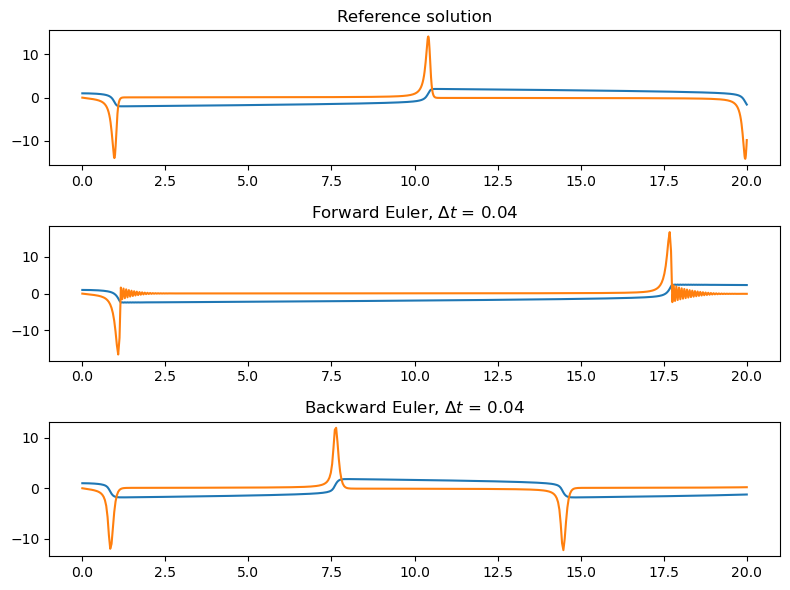

In [3]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# initialization
model = VanderPol(mu=10)
solvers = [(ForwardEuler(model), "Forward Euler"), 
           (BackwardEuler(model), "Backward Euler")]

# setting
T = 20
t_span = (0, T)
u0 = [1, 0]

plt.figure(figsize=(8,6))

# reference solution
rtol = 1e-10
solution = solve_ivp(model, t_span, u0, rtol=rtol)
plt.subplot(3, 1, 1)
plt.plot(solution.t, solution.y[0, :])
plt.plot(solution.t, solution.y[1, :])
plt.title("Reference solution")

# Euler methods
for i, info in enumerate(solvers):
    solver, name = info
    solver.set_initial_condition(u0)
    N = 500
    t, u = solver.solve(t_span=t_span, N=N)
    plt.subplot(3, 1, i+2)
    plt.plot(t, u)
    plt.title(f"{name}, $\\Delta t$ = {T/N:g}")
plt.tight_layout() 
plt.show()

## Implicit Methods of Higher Order

The accuracy of implicit RK (IRK) methods  cna also be enhanced by increasing the number of stages. Here we explore two main branches of IRK methods: **fully implicit RK (FIRK) methods** and **diagonally implicit RK (DIRK) methods**.

Recall that all RK methods can be viewed as the following approximations:
$$
u(t_{n+1}) = u(t_n) + \int_{t_n}^{t_{n+1}}f(t,u(t))\approx u(t_n) + \Delta t\sum_{i=1}^sb_ik_i
$$ 
where $b_i$ are the weights and $k_i$ are the stage derivatives:
$$
k_i = f(t_n + c_i\Delta t, u_n + \Delta t\sum_{j=1}^s a_{ij}k_j),\quad i=1,\cdots,s
$$
The above euqations can be interpreted as approximations of the right-hand side function $f(t,u)$ at distinct time points $t_n + \Delta tc_i$.

### Fully Implicit RK Methods

For FIRK methods, the coefficients $a_{ij}$ are (potentially) non-zero, which means all stage derivatives depend on all other stage derivatives. So, we need to determine them all at once by solving a singe system of nonlinear equations. For an ODE system comprising $m$ equations, we must solve a system of $ms$ nonlinear euqations for each time step.

Many popular FIRK methods are based on combining standard **numerical integration quadrature methods** with the idea of **collocation**. We approximate the solution $u$ on the interval $t_n<t\leq t_{n+1}$ using a polynomial $P(t)$ of degree up to $s$, and require that $P(t)$ satisfies the ODE exactly at distinct points $t_n+c_i\Delta t$, which gives the following **collocation condition**:
$$
P^{\prime}(t_i) = f(t_i,P(t_i)),\quad t_i = t_n + c_i\Delta t,\quad i=1,\cdots,s
$$
which can uniquely determine $a_{ij}$ and $b_i$ with the given quadrature points $c_i$.

A convenient approach is to choose $c_i$ from strandard quadrature rules and solve the collocation condition to determine the remaining parameters, which leads to families of FIRK based on common numerical intergration rules.

#### Gauss Methods

If we choose $c_i$ as the Guass points, we obtain the Gauss methods, which are the most accurate methods for $s$ stages, achieving order $2s$. Since $P(t)$ is a ploynomial, we can use the Lagrangian interpolation to express its derivative:
$$
P^{\prime}(t_n+\tau\Delta t) = \sum_{j=1}^sl_j(\tau)f(t_j,P(t_j)) = \sum_{j=1}^sl_j(\tau)k_j
$$
where $l_j$ is the Lagrangian basis function:
$$
l_j(\tau) = \prod_{m\neq j}\frac{\tau-c_m}{c_j-c_m}
$$
The intergration of $P^{\prime}(t)$ gives:
$$
P(t_n + \tau\Delta t) = P(t_n) + \int_{t_n}^{t_n+\tau\Delta t}P^{\prime}(t)dt
$$
Set $t = t_n + \sigma\Delta t$, we have
$$
P(t_n + \tau\Delta t) = u_n + \Delta t\int_{0}^{\tau}P^{\prime}(t_n+\sigma\Delta t)d\sigma
$$
Substitute the expression of $P^{\prime}(t_n+\tau\Delta t)$, we have:
$$
P(t_n + \tau\Delta t) = u_n + \Delta t\sum_{j=1}^sk_j\int_{0}^{\tau}l_j(\sigma)d\sigma
$$
Let $\tau = c_i$, we have
$$
P(t_i) = P(t_n + c_i\Delta t) = u_n + \Delta t\sum_{j=1}^sk_ja_{ij}
$$
where
$$
a_{ij} = \int_{0}^{c_i}l_j(\sigma)d\sigma
$$
Let $\tau=1$, we have
$$
u_{n+1} = P(t_n + \Delta t) = u_n + \Delta t\sum_{j=1}^sk_jb_{j}
$$
where
$$
b_j = \int_{0}^{1}l_j(\sigma)d\sigma
$$
> The Gauss methods are A-stable but not L-stable?

The single-stage Gauss method corresponds to the **implicit midpoint method**, and the fourth-order Gauss method with $s=2$ is defined by:
$$
\begin{array}{c|cc}
\frac{3-\sqrt{3}}{6}   & \frac{1}{4} & \frac{3-2\sqrt{3}}{12} \\
\frac{3+\sqrt{3}}{6}   & \frac{3+2\sqrt{3}}{12} & \frac{1}{4} \\
\hline
 & \frac{1}{2} & \frac{1}{2}  \\
\end{array}
$$

#### Radau IIA methods

Another family of FIRK methods, known as Radau IIA methods, is more commonly employed to solve stiff stiff problems. The collocation points include Radau quadrature points and the right end of the integration interval ($c_s=1$). The singe-stage Radau IIA method is the **backward Euler method** and the two- and three-stage versions are given by:
$$
\begin{array}{c|cc}
\frac{1}{3}   & \frac{5}{12} & -\frac{1}{12} \\
1   & \frac{3}{4} & \frac{1}{4} \\
\hline
 & \frac{3}{4} & \frac{1}{4}  \\
\end{array}
$$

$$
\begin{array}{c|ccc}
\frac{4-\sqrt{6}}{10} &  \frac{88-7\sqrt{6}}{360} & \frac{296-169\sqrt{6}}{1800} & \frac{-2+3\sqrt{6}}{225}\\
\frac{4+\sqrt{6}}{10} & \frac{296+169\sqrt{6}}{1800} & \frac{88+7\sqrt{6}}{360} & \frac{-2-3\sqrt{6}}{225}\\
1 & \frac{16-\sqrt{6}}{36} & \frac{16+\sqrt{6}}{36} & \frac{1}{9} \\
\hline
 & \frac{16-\sqrt{6}}{36} & \frac{16+\sqrt{6}}{36} & \frac{1}{9} \\
\end{array}
$$
The Radau IIA methods exhibit order $2s-1$, and their stability functions are $(s-1,s)$ Pade approximations of the exponential function. For the two- and three-stage methods, they are:
$$
R(z) = \frac{1+z/3}{1-2z/3+z^2/6}
$$
$$
R(z) = \frac{1+2z/5+z^2/20}{1-3z/5+3z^2/20-z^2/60}
$$

### Diagonally Implicit RK Methods

**Diagonally Implicit RK (DIRK) methods**, also known as semi-implicit methods, are a subclass of implicit RK methods with $a_{ij}=0$ for all $j>i$. Since the stage derivative $k_i$ does not involve stages $k_{i+1}$, $k_{i+2}$ and so on, we can sequentially solve them one by one, which leads to $s$ systems of $m$ equations rather than solving one large $ms$ system.

A general DIRK method with $s$ stages has a maximum order of $s+1$ and methods optimized for stability typically have even lower order. 

The Crank-Nicolson (implicit trapezoidal) method is an example of a DIRK method, which is not L-stable. An example of an L-stable, two-stage DIRK method of order 2 is give by:
$$
\begin{array}{c|cc}
\gamma   & \gamma & 0 \\
1   & 1-\gamma & \gamma \\
\hline
 & 1-\gamma & \gamma  \\
\end{array}
$$
with stability function
$$
R(z) = \frac{1+z(1-2\gamma)}{(1-z\gamma)^2}
$$
which is A-stable for $\gamma>1/4$ and L-stable for $\gamma=1\pm\sqrt{2}/2$. The most popular choice is $\gamma=1-\sqrt{2}/2\approx0.293$ as it does not exceed the time interval.

Note that the two diagonal entries of $a_{ij}$ are identical. This kind of methods are known as **single diagonally implicit RK (SDIRK) methods**, and this particular structure can be utilized to implement a custom quasi-Newton solver to improve the computational performance.

Another method class is the **explicit singly diagonally implicit RK (ESDIRK) methods**, which are simply SDIRK methods where the first stage is explicit. The simplest one is the implicit trapezoidal (Crank-Nicolson) method. A popular extension of this method is given by:
$$
\begin{array}{c|ccc}
0   & 0 &  \\
2\gamma   & \gamma & \gamma &0\\
1   & \beta & \beta &\gamma\\
\hline
 & \beta & \beta &\gamma  \\
\end{array}
$$
where $\gamma=1-\sqrt{2}/2$ and $\beta=\sqrt{2}/4$. This methodand, known as TR-BDF2, can be interpreted as the sequential application of the trapezoidal method and a popular multistep solver called BDF2, which is second-order accurate and L-stable.

## Implementing Higher Order IRK Methods

A base class for implicit RK methods can be defined as follows:

In [4]:
class ImplicitRK(ODESolver):
    def solve_stages(self):
        u, f, n, t = self.u, self.f, self.n, self.t
        s = self.stages
        k0 = f(t[n], u[n])
        k0 = onp.tile(k0, s)

        sol = root(self.stage_eq, k0)

        return onp.split(sol.x, s)
    
    def stage_eq(self, k_all):
        a, c = self.a, self.c
        s, neq = self.stages, self.neq

        u, f, n, t = self.u, self.f, self.n, self.t
        dt = self.dt

        res = onp.zeros_like(k_all)
        k = onp.split(k_all, s)
        for i in range(s):
            fi = f(t[n] + c[i] * dt, u[n] + dt *
                   sum([a[i, j] * k[j] for j in range(s)]))
            res[i * neq:(i+1) * neq] = k[i] - fi
        
        return res
    
    def advance(self):
        b = self.b
        u, n, t = self.u, self.n, self.t
        dt = self.dt
        k = self.solve_stages()
        return u[n] + dt * sum(b_ * k_ for b_, k_ in zip(b, k))
        

Then we can implement new solvers by defining the method coefficients. The implicit midpoint and two- and three- stage Radau methods can be defined by:

In [5]:
class ImplicitMidpoint(ImplicitRK):
    def __init__(self, f):
        super().__init__(f)
        self.stages = 1
        self.a = onp.array([1/2])
        self.c = onp.array([1/2])
        self.b = onp.array([1.])


class Radau2(ImplicitRK):
    def __init__(self, f):
        super().__init__(f)
        self.stages = 2
        self.a = onp.array([[5/12, -1/12],[3/4, 1/4]])
        self.c = onp.array([1/3, 1.])
        self.b = onp.array([3/4, 1/4])

class Radau3(ImplicitRK):
    def __init__(self, f):
        super().__init__(f)
        self.stages = 3
        sq6 = onp.sqrt(6)
        self.a = onp.array([
            [(88 - 7 * sq6)/360, (296 - 169 * sq6)/1800, (-2 + 3 * sq6)/(225)], 
            [(296 + 169 * sq6)/1800, (88 + 7 * sq6)/360, (-2 - 3 * sq6)/(225)], 
            [(16 - sq6)/36, (16 + sq6)/36, 1/9]])
        self.c = onp.array([(4 - sq6)/10, (4 + sq6)/10, 1])
        self.b = onp.array([(16 - sq6)/36, (16 + sq6)/36, 1/9])

For the SDIRK and ESDIRK method ($a_{ij}=0$ for $j>i$), we can take advantage of the specific strcuture of the method coefficients and solve for the stage variables sequentially. In general, any stage equation for any **DIRK** method can be written as:
$$
k_i = f(t_n + c_i\Delta t, u_n + \Delta t(\sum_{j=0}^{i-1}a_{ij}k_j + \gamma k_i))
$$
Therefore, we have:

In [6]:
class SDIRK(ImplicitRK):
    def stage_eq(self, k, c_i, k_sum):
        u, f, n, t = self.u, self.f, self.n, self.t
        dt = self.dt
        gamma = self.gamma
        return k - f(t[n] + c_i * dt, u[n] + dt * (k_sum + gamma * k))
    
    def solve_stages(self):
        u, f, n, t = self.u, self.f, self.n, self.t
        a, c = self.a, self.c
        s = self.stages

        k = f(t[n], u[n]) # initial guess for the first stage
        k_sum = onp.zeros_like(k)
        k_all = []
        for i in range(s):
            k_sum = sum(a_ * k_ for a_, k_ in zip(a[i, :i], k_all))
            k = root(self.stage_eq, k, args=(c[i], k_sum)).x
            k_all.append(k)
        
        return k_all

An implementation of the two-stage DIRK method can be written as:

In [7]:
class SDIRK2(SDIRK):
    def __init__(self, f):
        super().__init__(f)
        self.stages = 2
        gamma = (2 - onp.sqrt(2))/2
        self.gamma = gamma
        self.a = onp.array([[gamma, 0],
                            [1-gamma, gamma]])
        self.c = onp.array([gamma, 1])
        self.b = onp.array([1-gamma, gamma])

An implementation of the ESDIRK method can be written as:

In [8]:
class ESDIRK(SDIRK):
    def solve_stages(self):
        u, f, n, t = self.u, self.f, self.n, self.t
        a, c = self.a, self.c
        s = self.stages

        k = f(t[n], u[n]) 
        k_sum = onp.zeros_like(k)
        k_all = [k]
        for i in range(1, s):
            k_sum = sum(a_ * k_ for a_, k_ in zip(a[i, :i], k_all))
            k = root(self.stage_eq, k, args=(c[i], k_sum)).x
            k_all.append(k)
        
        return k_all

An implementation of the TR-BDF2 method can be written as:

In [9]:
class TR_BDF2(ESDIRK):
    def __init__(self, f):
        super().__init__(f)
        self.stages = 3
        gamma = 1 - onp.sqrt(2)/2
        beta = onp.sqrt(2)/4
        self.gamma = gamma
        self.a = onp.array([[0, 0, 0],
                            [gamma, gamma, 0],
                            [beta, beta, gamma]])
        self.c = onp.array([0, 2 * gamma, 1])
        self.b = onp.array([beta, beta, gamma])

Solutions of the Van der Pol model for $\mu=10$ and $\Delta t=0.1$ using the above solvers are shown as follows:

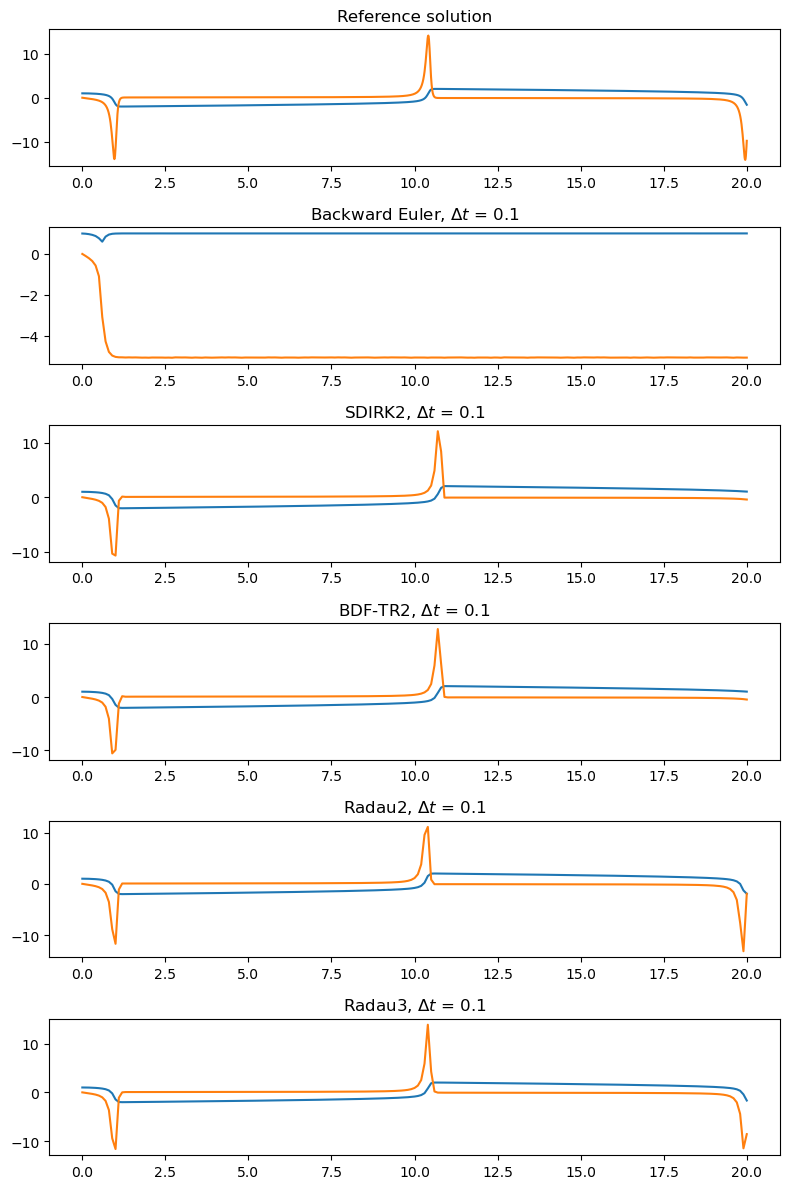

In [10]:
# initialization
model = VanderPol(mu=10)
solvers = [(BackwardEuler(model), "Backward Euler"),
           (SDIRK2(model), "SDIRK2"),
           (TR_BDF2(model), "BDF-TR2"),
           (Radau2(model), "Radau2"),
           (Radau3(model), "Radau3")]

# setting
T = 20
t_span = (0, T)
u0 = [1, 0]

plt.figure(figsize=(8,12))
num_subfigs = len(solvers) + 1
# reference solution
rtol = 1e-10
solution = solve_ivp(model, t_span, u0, rtol=rtol)
plt.subplot(num_subfigs, 1, 1)
plt.plot(solution.t, solution.y[0, :])
plt.plot(solution.t, solution.y[1, :])
plt.title("Reference solution")

# Euler methods
for i, info in enumerate(solvers):
    solver, name = info
    solver.set_initial_condition(u0)
    N = 200
    t, u = solver.solve(t_span=t_span, N=N)
    plt.subplot(num_subfigs, 1, i+2)
    plt.plot(t, u)
    plt.title(f"{name}, $\\Delta t$ = {T/N:g}")
plt.tight_layout() 
plt.show()